In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [362]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('Supermart Grocery Sales - Retail Analytics Dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.120000,401.280000,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.180000,149.800000,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.210000,165.200000,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.250000,89.600000,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.260000,918.450000,Tamil Nadu


In [366]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 9994
Number of columns: 11


In [368]:
df.dtypes

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

In [370]:
col_names = df.columns

col_names

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [372]:
df['Order Date'].info

<bound method Series.info of 0       11-08-2017
1       11-08-2017
2       06-12-2017
3       10-11-2016
4       10-11-2016
           ...    
9989    12/24/2015
9990    07-12-2015
9991    06-06-2017
9992    10/16/2018
9993     4/17/2018
Name: Order Date, Length: 9994, dtype: object>

In [373]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [374]:
df.duplicated().sum()

0

In [375]:
df['Category'].unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

In [376]:
df['Category'].value_counts(normalize=False)

Category
Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: count, dtype: int64

In [379]:
df['Sub Category'].unique()

array(['Masalas', 'Health Drinks', 'Atta & Flour', 'Fresh Vegetables',
       'Organic Staples', 'Fresh Fruits', 'Biscuits', 'Cakes',
       'Chocolates', 'Eggs', 'Cookies', 'Chicken', 'Edible Oil & Ghee',
       'Mutton', 'Soft Drinks', 'Dals & Pulses', 'Organic Vegetables',
       'Noodles', 'Organic Fruits', 'Fish', 'Spices', 'Rice',
       'Breads & Buns'], dtype=object)

In [380]:
df['Sub Category'].value_counts(normalize=False)

Sub Category
Health Drinks         719
Soft Drinks           681
Cookies               520
Breads & Buns         502
Chocolates            499
Noodles               495
Masalas               463
Biscuits              459
Cakes                 452
Edible Oil & Ghee     451
Spices                447
Mutton                394
Eggs                  379
Organic Staples       372
Fresh Fruits          369
Fish                  369
Fresh Vegetables      354
Atta & Flour          353
Organic Fruits        348
Chicken               348
Organic Vegetables    347
Dals & Pulses         343
Rice                  330
Name: count, dtype: int64

In [382]:
df['City'].unique()

array(['Vellore', 'Krishnagiri', 'Perambalur', 'Dharmapuri', 'Ooty',
       'Trichy', 'Ramanadhapuram', 'Tirunelveli', 'Chennai', 'Karur',
       'Namakkal', 'Dindigul', 'Kanyakumari', 'Bodi', 'Tenkasi',
       'Viluppuram', 'Madurai', 'Salem', 'Cumbum', 'Nagercoil',
       'Pudukottai', 'Theni', 'Coimbatore', 'Virudhunagar'], dtype=object)

In [383]:
# Remove unnecessary columns
df = df.drop(columns=['Order ID', 'State'])

# Rename columns
df = df.rename(columns={'Sub Category': 'Sub_Category', 'Order Date': 'Order_Date'})


In [385]:
# Convert date column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Check for any remaining null values in the date column
df[df['Order_Date'].isnull()]

,Customer Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit
12,Sharon,Snacks,Cookies,Dindigul,NaT,South,1659,0.19,315.21
14,Sundar,"Eggs, Meat & Fish",Chicken,Kanyakumari,NaT,Central,831,0.22,207.75
15,Ramesh,Oil & Masala,Edible Oil & Ghee,Krishnagiri,NaT,Central,1440,0.11,100.80
17,Arutra,Beverages,Health Drinks,Bodi,NaT,West,1617,0.19,113.19
18,Haseena,"Eggs, Meat & Fish",Mutton,Tenkasi,NaT,West,1757,0.35,386.54
...,...,...,...,...,...,...,...,...,...
9985,Shree,"Eggs, Meat & Fish",Mutton,Kanyakumari,NaT,West,1286,0.30,475.82
9987,Ganesh,Fruits & Veggies,Fresh Vegetables,Theni,NaT,West,1350,0.15,67.50
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,NaT,West,945,0.16,359.10
9992,Peer,Oil & Masala,Spices,Pudukottai,NaT,West,1659,0.15,597.24


In [386]:
# Convert date column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%m/%d/%Y')

In [388]:
# Convert date column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%m/%d/%Y')
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%m-%d-%Y')

In [389]:
df.describe()

,Order_Date,Sales,Discount,Profit
count,4042,9994.000000,9994.000000,9994.000000
mean,2017-04-28 03:16:17.931716864,1496.596158,0.226817,374.937082
min,2015-01-03 00:00:00,500.000000,0.100000,25.250000
25%,2016-05-09 06:00:00,1000.000000,0.160000,180.022500
50%,2017-07-01 00:00:00,1498.000000,0.230000,320.780000
75%,2018-06-01 00:00:00,1994.750000,0.290000,525.627500
max,2018-12-11 00:00:00,2500.000000,0.350000,1120.950000
std,NaN,577.559036,0.074636,239.932881


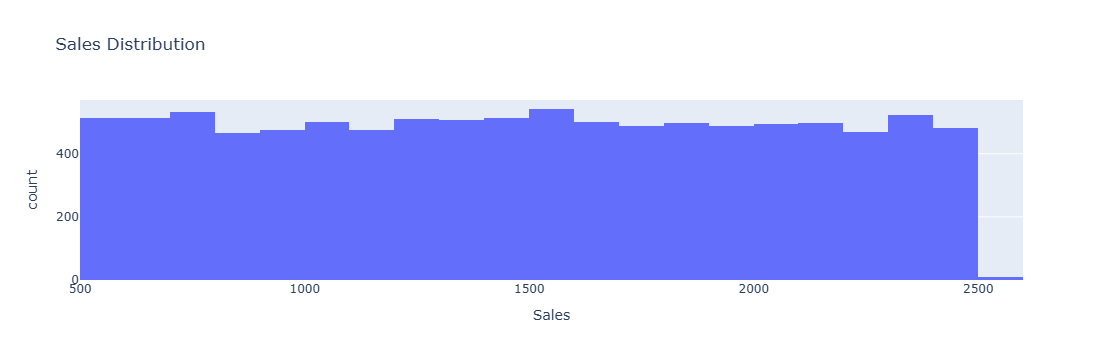

In [390]:
# histogram of sales
fig = px.histogram(df, x='Sales', nbins=30, title='Sales Distribution')
fig.show()

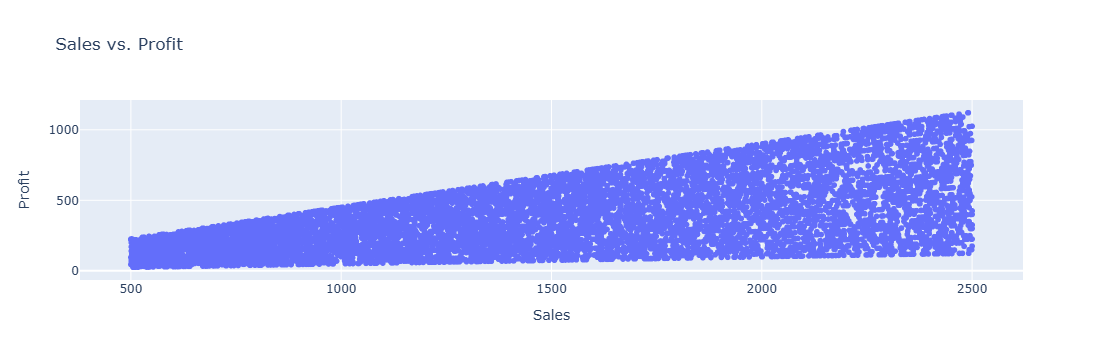

In [391]:
# scatterplot of sales and profit
fig = px.scatter(df, x='Sales', y='Profit', title='Sales vs. Profit')
fig.show()

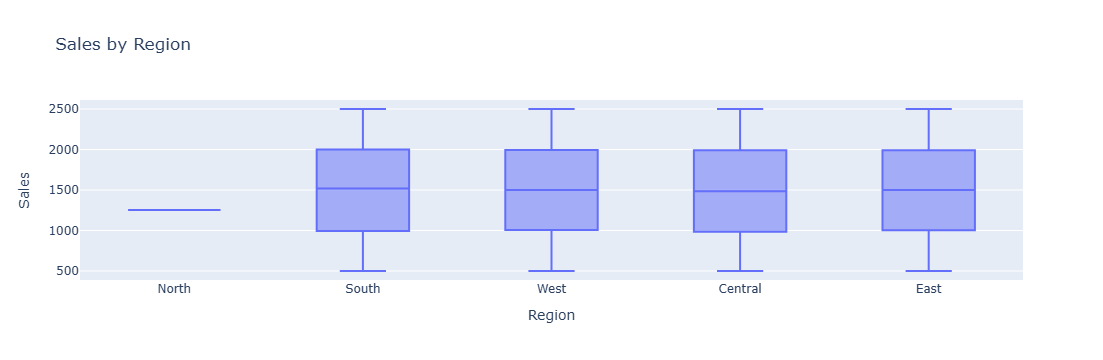

In [392]:
# boxplot of sales by region
fig = px.box(df, x='Region', y='Sales', title='Sales by Region')
fig.show()

In [393]:
# Calculate total sales by category and sub-category
category_sales = df.groupby(['Category', 'Sub_Category'])['Sales'].sum().reset_index()

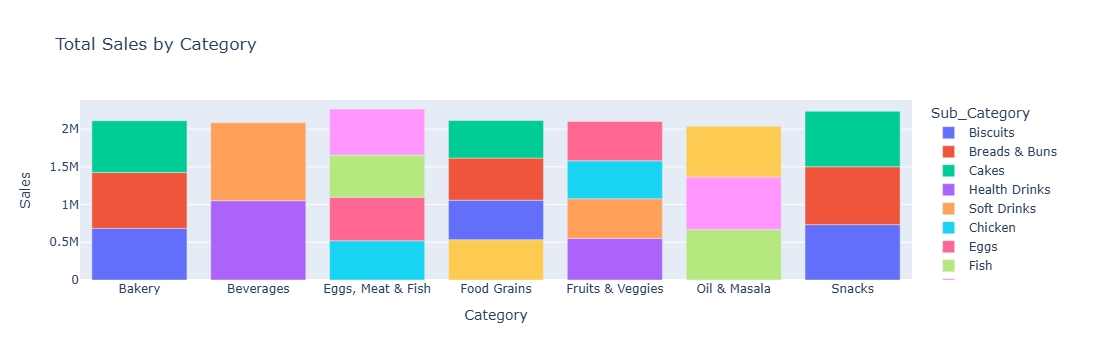

In [403]:
fig = px.bar(category_sales, x='Category', y='Sales', color='Sub_Category', title='Total Sales by Category')
fig.show()

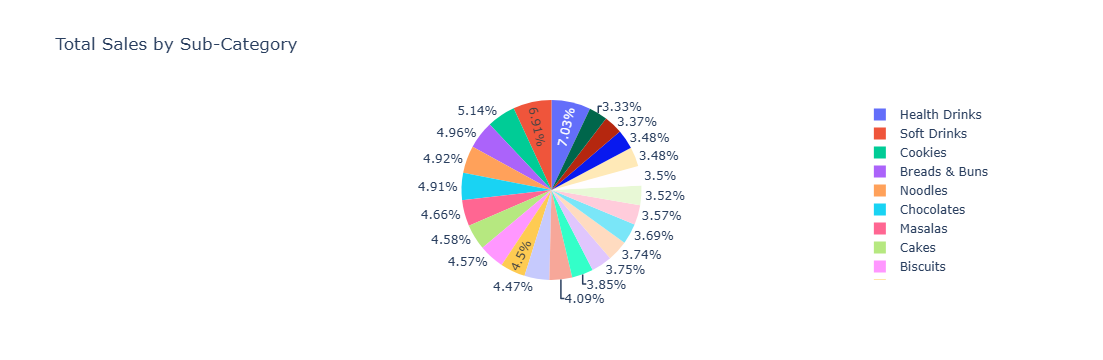

In [407]:
# pie chart of total sales by sub-category

fig = px.pie(category_sales, values='Sales', names='Sub_Category', title='Total Sales by Sub-Category')
fig.show()

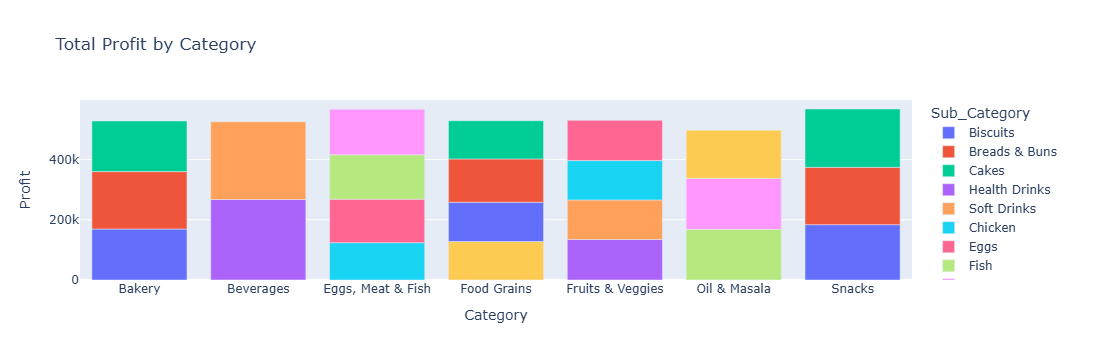

In [408]:
# Calculate total profit by category and sub-category
category_profit = df.groupby(['Category', 'Sub_Category'])['Profit'].sum().reset_index()

# Create bar chart of total profit by category
fig = px.bar(category_profit, x='Category', y='Profit', color='Sub_Category', title='Total Profit by Category')
fig.show()

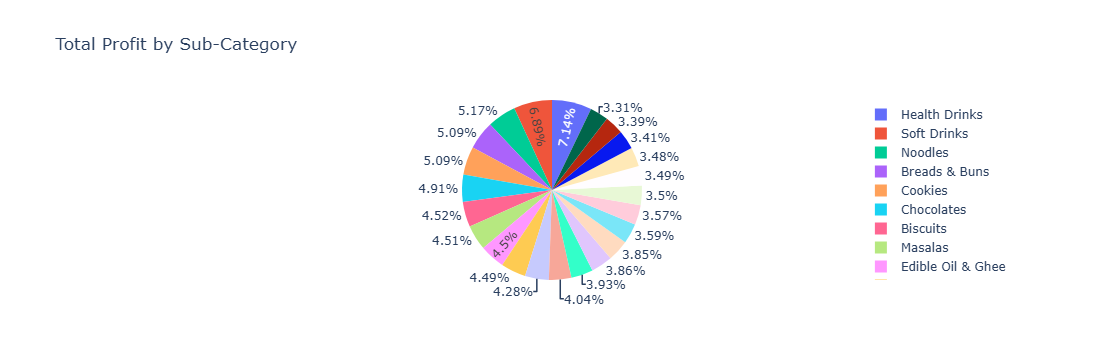

In [409]:
# pie chart of total profit by sub-category
fig = px.pie(category_profit, values='Profit', names='Sub_Category', title='Total Profit by Sub-Category')
fig.show()

In [410]:
# Calculate total sales and profit by region
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()

# Merge the two dataframes
sales_profit_by_region = pd.merge(sales_by_region, profit_by_region, on='Region')

# Display the results
sales_profit_by_region.head()

,Region,Sales,Profit
0,Central,3468156,856806.84
1,East,4248368,1074345.58
2,North,1254,401.28
3,South,2440461,623562.89
4,West,4798743,1192004.61


This will give us the total sales and profit for each region:

Next, we can create visualizations such as bar charts or pie charts to display the sales and profit data. Here's an example of a bar chart that shows the total sales and profit by region:

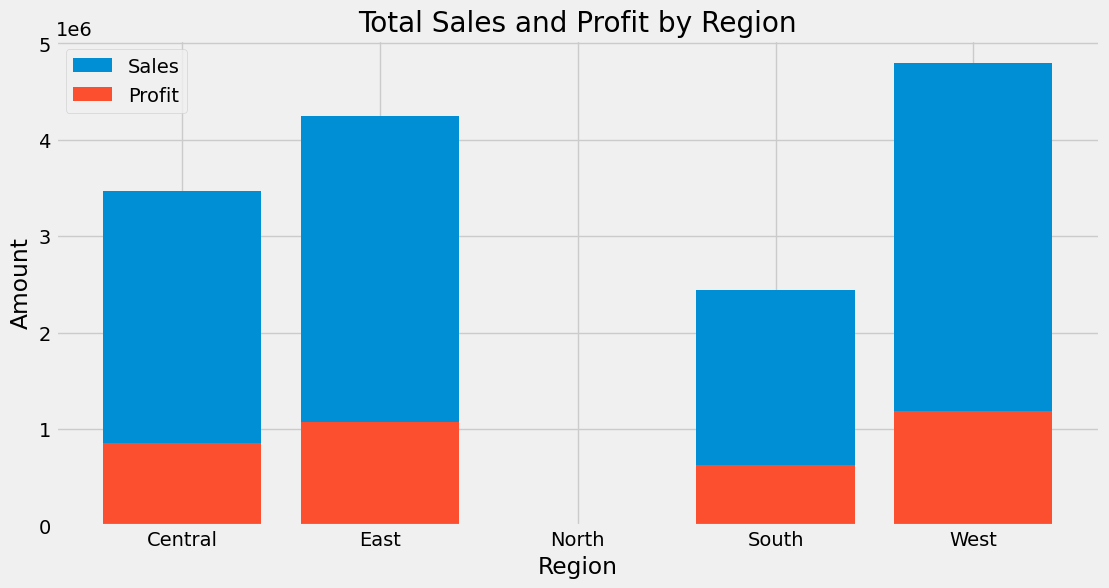

In [413]:

# Plot the bar chart
fig, ax = plt.subplots()
ax.bar(sales_profit_by_region['Region'], sales_profit_by_region['Sales'], label='Sales')
ax.bar(sales_profit_by_region['Region'], sales_profit_by_region['Profit'], label='Profit')
ax.set_xlabel('Region')
ax.set_ylabel('Amount')
ax.set_title('Total Sales and Profit by Region')
ax.legend()
plt.show()

This will give us a bar chart that shows the total sales and profit by region:

We can see that the East and West regions have the highest sales and profit, while the North region has the lowest sales.

In [415]:
# Calculate total sales and profit by city
sales_by_city = df.groupby('City')['Sales'].sum().reset_index()
profit_by_city = df.groupby('City')['Profit'].sum().reset_index()

# Merge the two dataframes
sales_profit_by_city = pd.merge(sales_by_city, profit_by_city, on='City')

# Display the results
sales_profit_by_city.head()

,City,Sales,Profit
0,Bodi,667177,173655.13
1,Chennai,634963,160921.33
2,Coimbatore,634748,157399.41
3,Cumbum,626047,156355.13
4,Dharmapuri,571553,141593.05


And now we Analyze discounts

In [417]:
df = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head(10).style.set_properties(**{'background-color':'lightgreen','color':'black','border-color':'#8b8c8c'})

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.120000,401.280000,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.180000,149.800000,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.210000,165.200000,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.250000,89.600000,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.260000,918.450000,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.260000,322.700000,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.330000,346.920000,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.320000,147.760000,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.230000,181.930000,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.270000,484.650000,Tamil Nadu


And now we create a new column for year:

In [419]:
df['Year'] = pd.DatetimeIndex(df['Order Date']).year

Create a bar chart for discount sales percent by year:

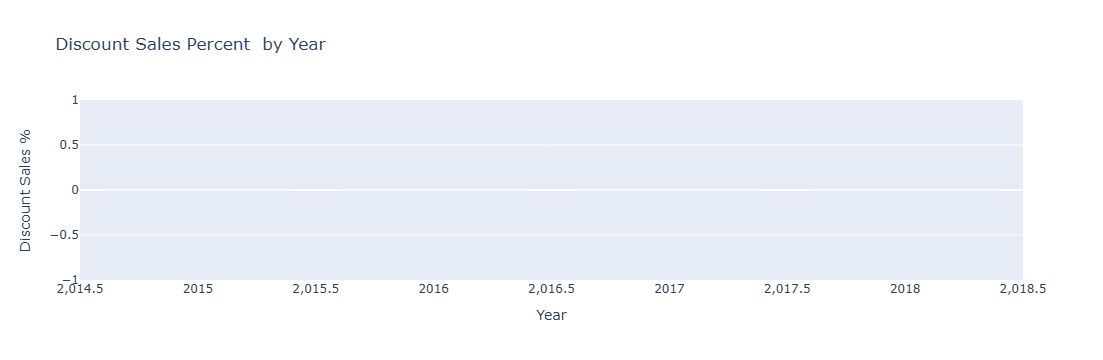

In [422]:
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()
discount_sales_by_year = df.groupby('Year')['Sales'].apply(lambda x: x[x!=0].sum()).reset_index()

discount_sales_by_year['Discount Sales %'] = (1 - discount_sales_by_year['Sales'] / sales_by_year['Sales']) * 100

fig = px.bar(discount_sales_by_year, x='Year', y='Discount Sales %', title='Discount Sales Percent  by Year')
fig.show()

Create a bar chart for discount percent by year:

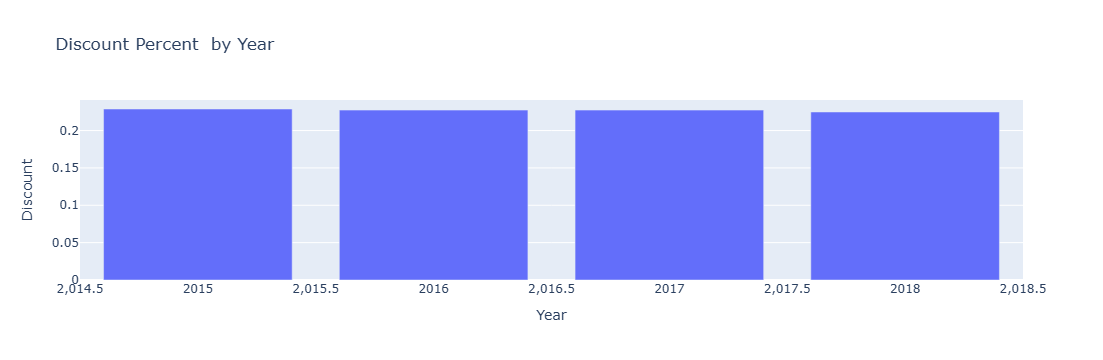

In [426]:
discount_by_year = df.groupby('Year')['Discount'].mean().reset_index()

fig = px.bar(discount_by_year, x='Year', y='Discount', title='Discount Percent  by Year')
fig.show()

Create a scatter plot for discount and sales per region:

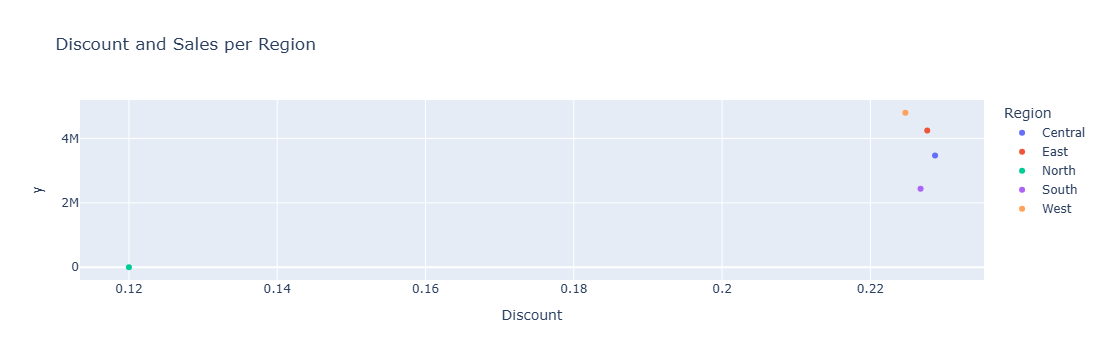

In [435]:
discount_sales_by_region = df.groupby('Region')['Sales'].apply(lambda x: x[x!=0].sum()).reset_index()
discount_by_region = df.groupby('Region')['Discount'].mean().reset_index()

fig = px.scatter(discount_by_region, x='Discount', y=discount_sales_by_region['Sales'], color='Region',
                 title='Discount and Sales per Region')
fig.show()

Create a scatter plot for discount and sales per city:

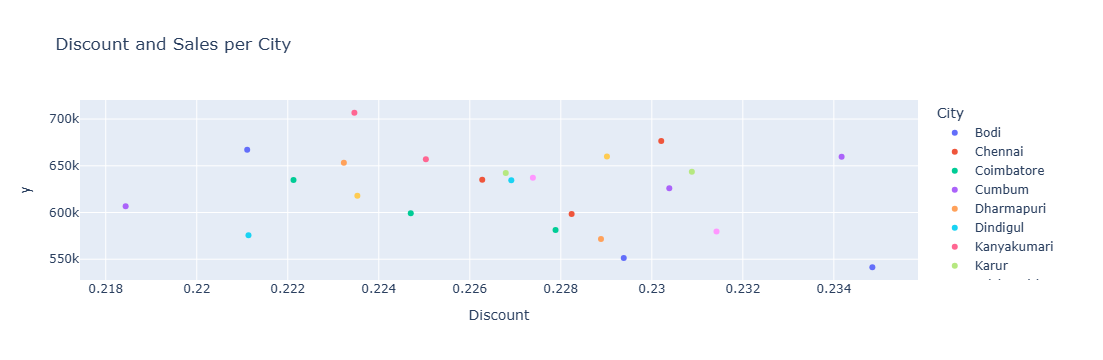

In [438]:
discount_sales_by_city = df.groupby('City')['Sales'].apply(lambda x: x[x!=0].sum()).reset_index()
discount_by_city = df.groupby('City')['Discount'].mean().reset_index()

fig = px.scatter(discount_by_city, x='Discount', y=discount_sales_by_city['Sales'], color='City',
                 title='Discount and Sales per City')
fig.show()

Interpretation:

From the Discount Sales Percent by Year bar chart, we can see that the discount sales percent has been increasing since 2015, peaking in 2016, and then slightly decreasing until 2018.

From the Discount Percent by Year bar chart, we can see that the average discount percent has been relatively stable over the years, ranging from around 0.1 to 0.3.

From the Discount and Sales per Region scatter plot, we can see that the South region has the highest discount percent and sales, while the Central region has the lowest discount percent and sales.

From the Discount and Sales per City scatter plot, we can see that the cities with the highest sales and discount percent are Krishnagiri and vellore, while the city with the lowest sales and discount percent is Trichy.





Analyze discounts and their impact on profit
Calculate the average discount for each category and sub-category.

Analyze the relationship between discounts and profit by creating scatterplots or line charts.

To calculate the average discount for each category and sub-category, you can group the data by category and sub-category and calculate the mean discount for each grthon:

In [442]:
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv", usecols=["Order ID", "Customer Name", "Category", "Sub Category", "City", "Order Date", "Region", "Sales", "Discount", "Profit", "State"])

# Calculate the average discount for each category and sub-category
avg_discount = df.groupby(["Category", "Sub Category"])["Discount"].mean()

# Print the results
print(avg_discount.head())

Category   Sub Category 
Bakery     Biscuits         0.225033
           Breads & Buns    0.226494
           Cakes            0.224646
Beverages  Health Drinks    0.231558
           Soft Drinks      0.229031
Name: Discount, dtype: float64


This will give you the average discount for each category and sub-category in the dataset.

To analyze the relationship between discounts and profit, you can create scatterplots or line charts.

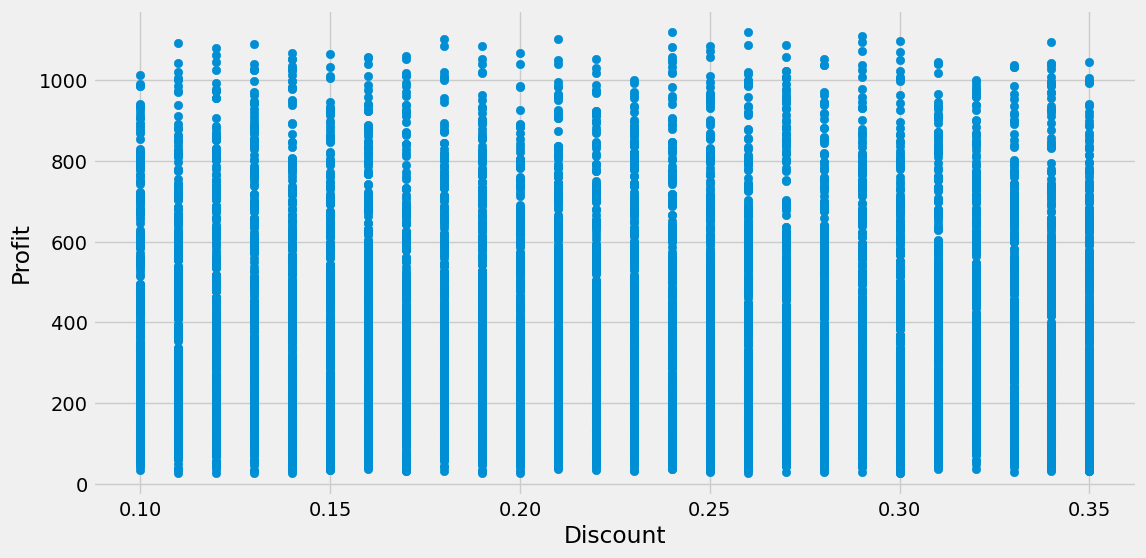

In [445]:
plt.scatter(df["Discount"], df["Profit"])
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

This will give you a scatterplot showing the relationship between discounts and profit in the dataset.

Total Sales & Orders by Region

In [449]:
region = pd.pivot_table(data=df, index='Region', values=['Order ID', 'Sales'], 
               aggfunc = {'Order ID':'count', 'Sales':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
region

,Region,Order ID,Sales
4,West,3203,4798743
1,East,2848,4248368
0,Central,2323,3468156
3,South,1619,2440461
2,North,1,1254


We'll now plot two graphs to visualize the total sales and orders by each region. I did not not plot both the details in the same graph because of one reason. The range of each of the columns is very different. Our graph will look weird if we plot both the details in the same plot. We could rescale it to fit both of them within the same range, but that will change the actual values.

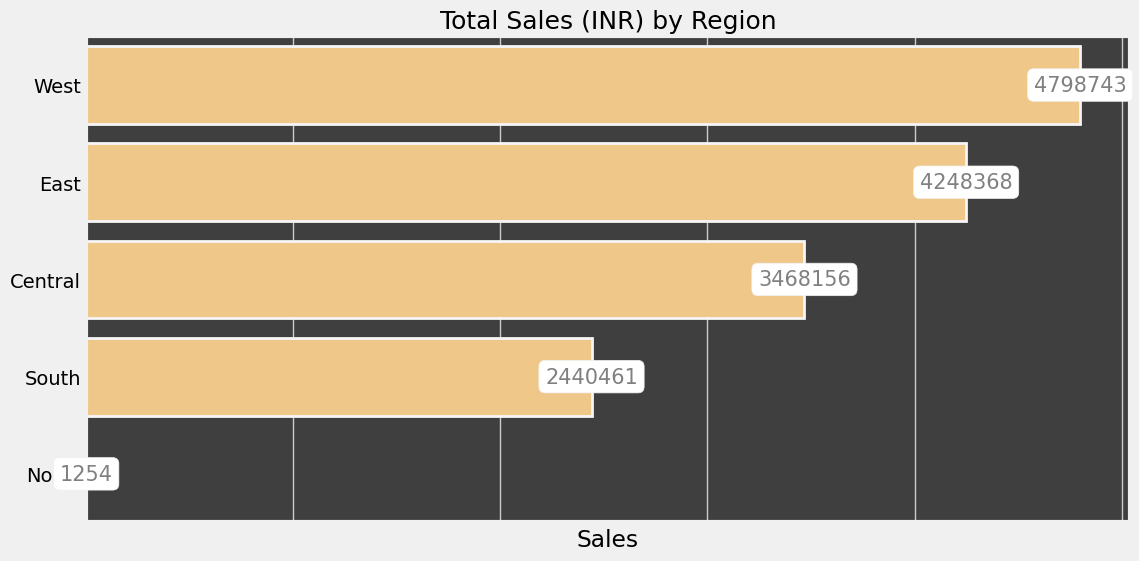

In [459]:
plt.rcParams['figure.figsize'] = (12,6)
ax = plt.axes()
ax.set_facecolor('#3F3F3f')
sns.barplot(y='Region', x='Sales', data=region, color='#FFCB78', linewidth=2, edgecolor='#F6F6F8')

# annotating the values on the plot
bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'grey', 
             bbox = bbox_args, 
             fontsize = 15)
plt.title('Total Sales (INR) by Region', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.ylabel(None)

plt.show()

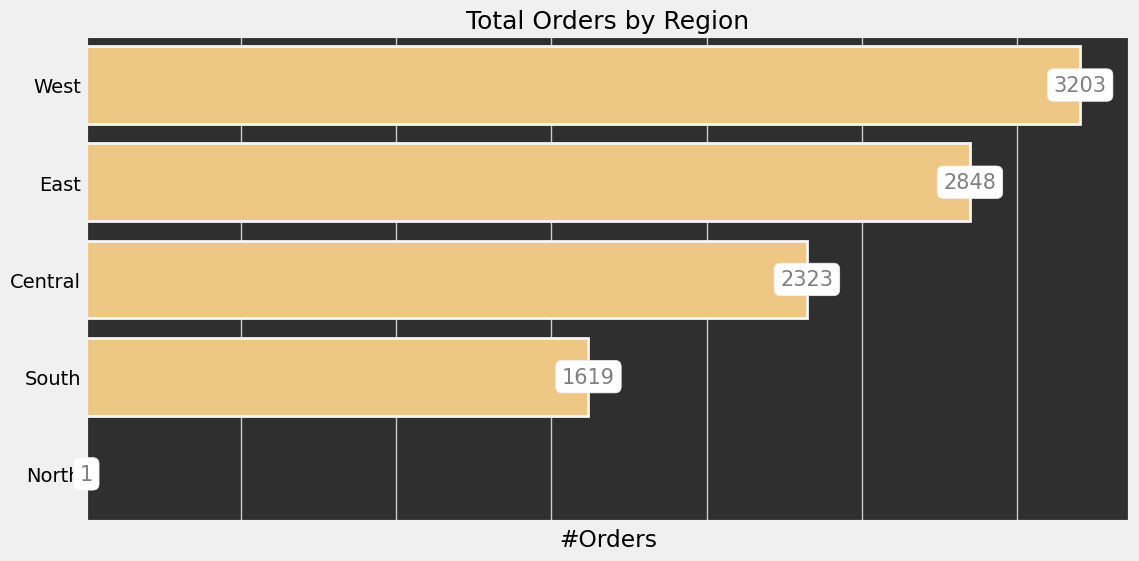

In [461]:

plt.rcParams['figure.figsize'] = (12,6)

ax = plt.axes()
ax.set_facecolor('#2F2F2f')

sns.barplot(y='Region', x='Order ID', data=region, color='#FFCB74', linewidth=2, edgecolor='#F6F6F6')


bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'grey', 
             bbox = bbox_args, 
     fontsize = 15)

plt.title('Total Orders by Region', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.xlabel('#Orders')
plt.ylabel(None)

plt.show()

Total Sales by Category & Sub Category








We'll now find the total sales by Category and further group it down to each Sub Category within it. We'll assign two values within the index parameter of the .pivot_table() function to achieve the results.

In [466]:
category_sales = pd.pivot_table(data=df, index=['Category', 'Sub Category'], values='Sales', 
               aggfunc='sum').reset_index().sort_values(['Category', 'Sales'], ascending=False)
category_sales

,Category,Sub Category,Sales
21,Snacks,Cookies,768213
22,Snacks,Noodles,735435
20,Snacks,Chocolates,733898
18,Oil & Masala,Masalas,697480
19,Oil & Masala,Spices,672876
17,Oil & Masala,Edible Oil & Ghee,668086
13,Fruits & Veggies,Fresh Fruits,551212
14,Fruits & Veggies,Fresh Vegetables,525842
16,Fruits & Veggies,Organic Vegetables,520271
15,Fruits & Veggies,Organic Fruits,503402


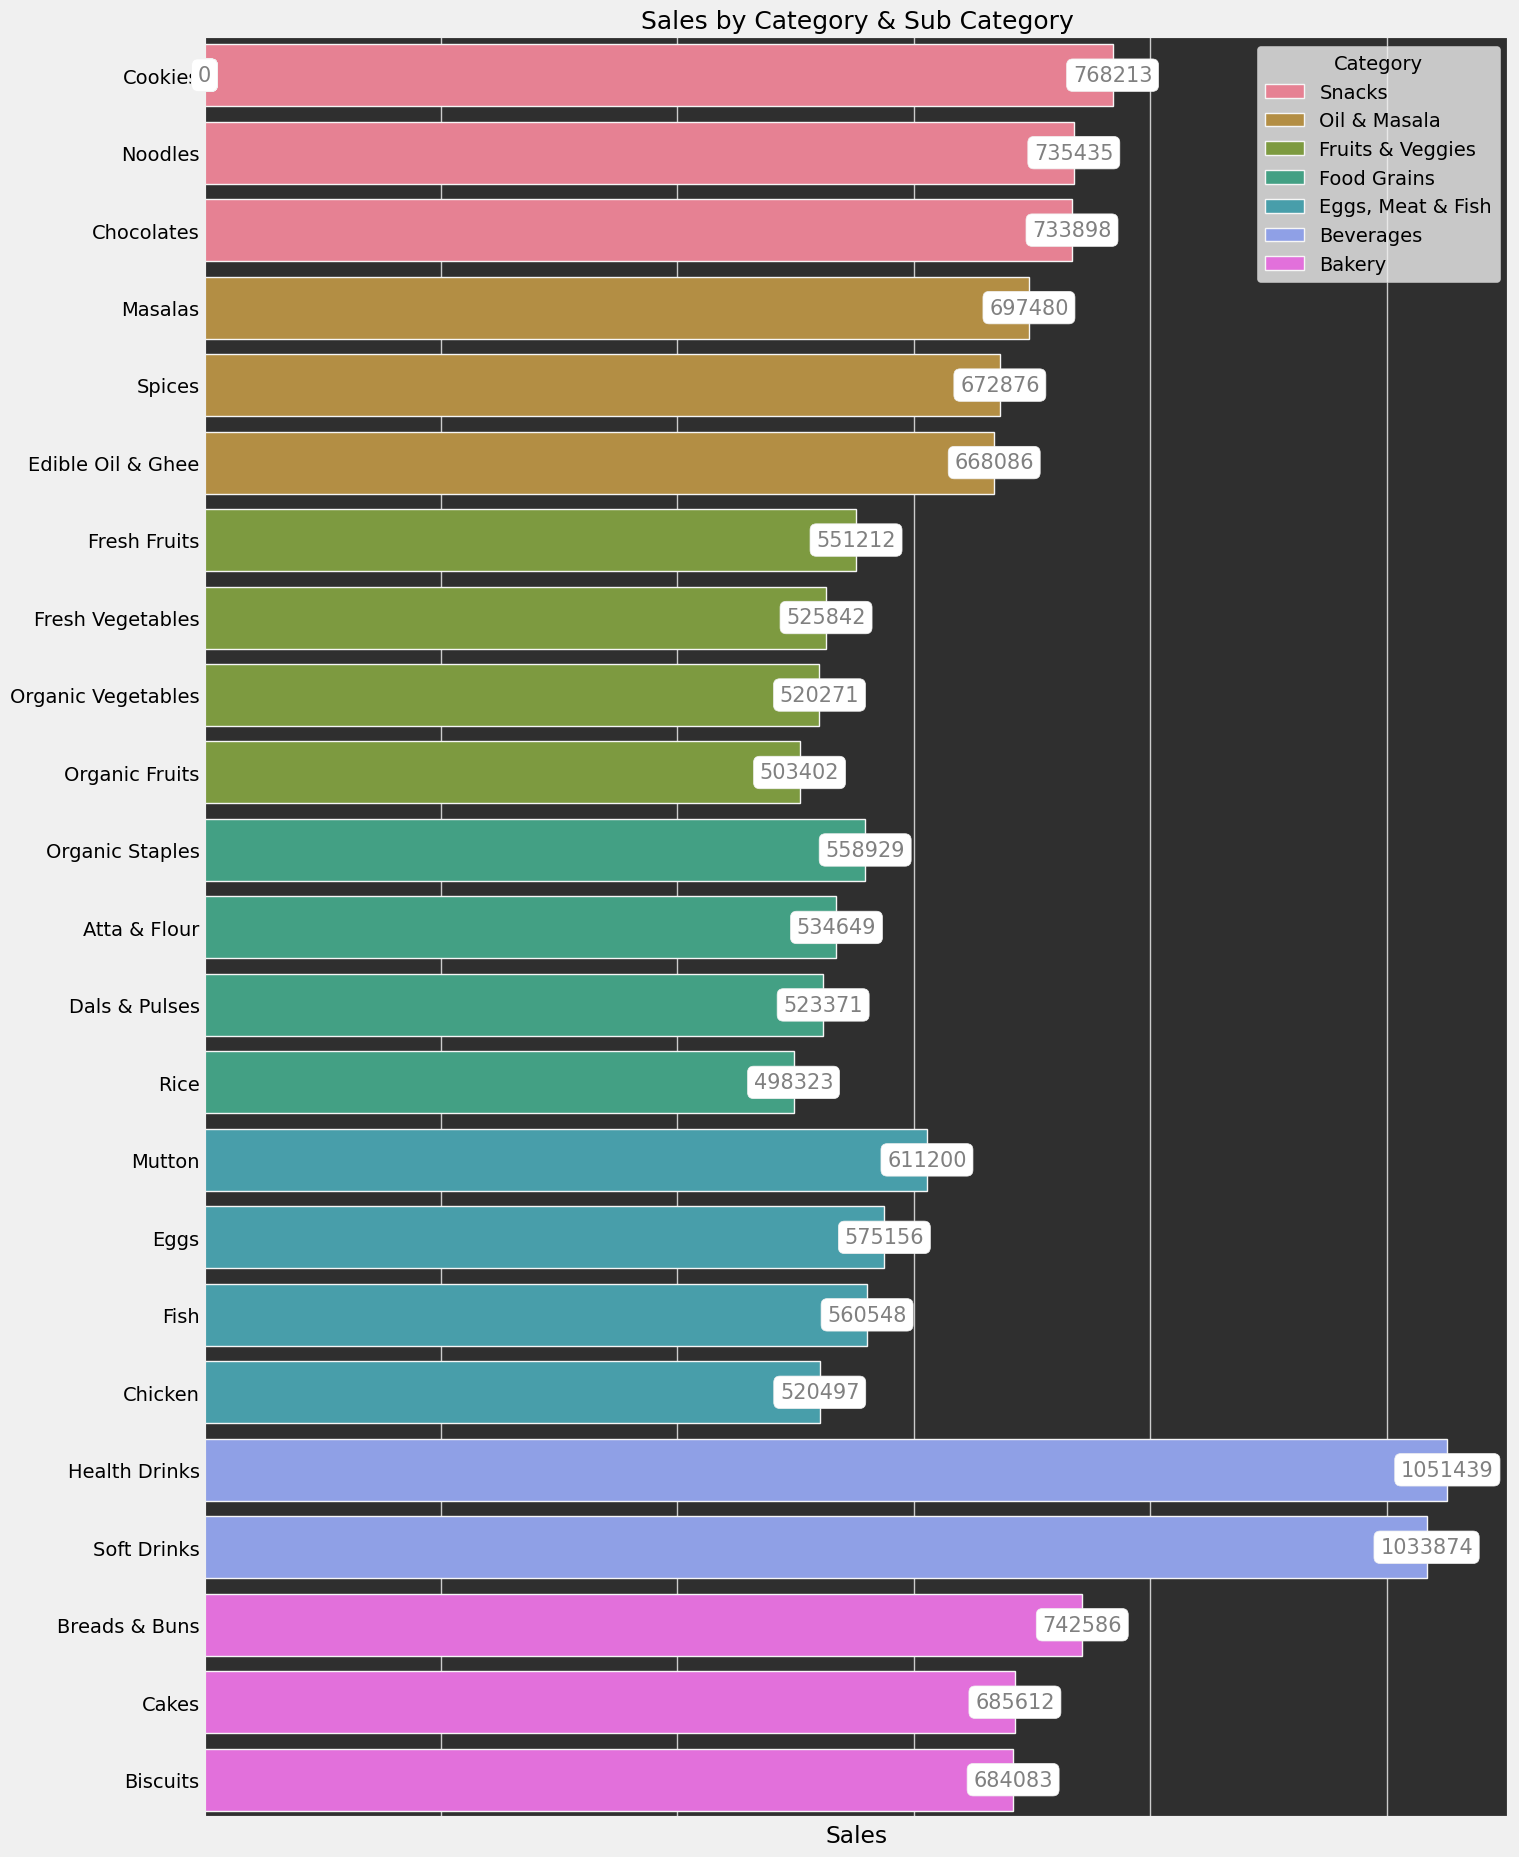

In [468]:
plt.rcParams['figure.figsize'] = (15,22)
ax = plt.axes()
ax.set_facecolor('#2F2F2F')
sns.barplot(y='Sub Category', x='Sales', data=category_sales, hue='Category', linewidth=1, edgecolor='#F6F6F6')

bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'grey', 
             bbox = bbox_args, 
             fontsize = 15)
    
plt.title('Sales by Category & Sub Category', fontsize = 18)
plt.ylabel(None)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.show()

The hue parameter of the barplot() helped us distinguish the Sub Categories by the Category to which they belong to.

Profit Margin by Sub Category

The profit margin can be calculated by dividing the profit by the total sales. As this needs to be computed for each sub category, we did not compute this on the original dataset. First let us group the data by sub category and then compute the profit margin.

In [473]:
profit = pd.pivot_table(data=df, index='Sub Category', values=['Sales', 'Profit'], aggfunc='sum').reset_index()
profit['Profit Margin'] = round((profit['Profit']/profit['Sales']) * 100,2)
profit.sort_values(by='Profit Margin', ascending=False, inplace = True)
profit

,Sub Category,Profit,Sales,Profit Margin
16,Noodles,193685.81,735435,26.34
10,Fish,147248.01,560548,26.27
17,Organic Fruits,130862.33,503402,26.00
18,Organic Staples,144136.89,558929,25.79
2,Breads & Buns,190764.98,742586,25.69
19,Organic Vegetables,133596.37,520271,25.68
20,Rice,126932.36,498323,25.47
13,Health Drinks,267469.79,1051439,25.44
8,Edible Oil & Ghee,168593.58,668086,25.24
9,Eggs,144669.92,575156,25.15


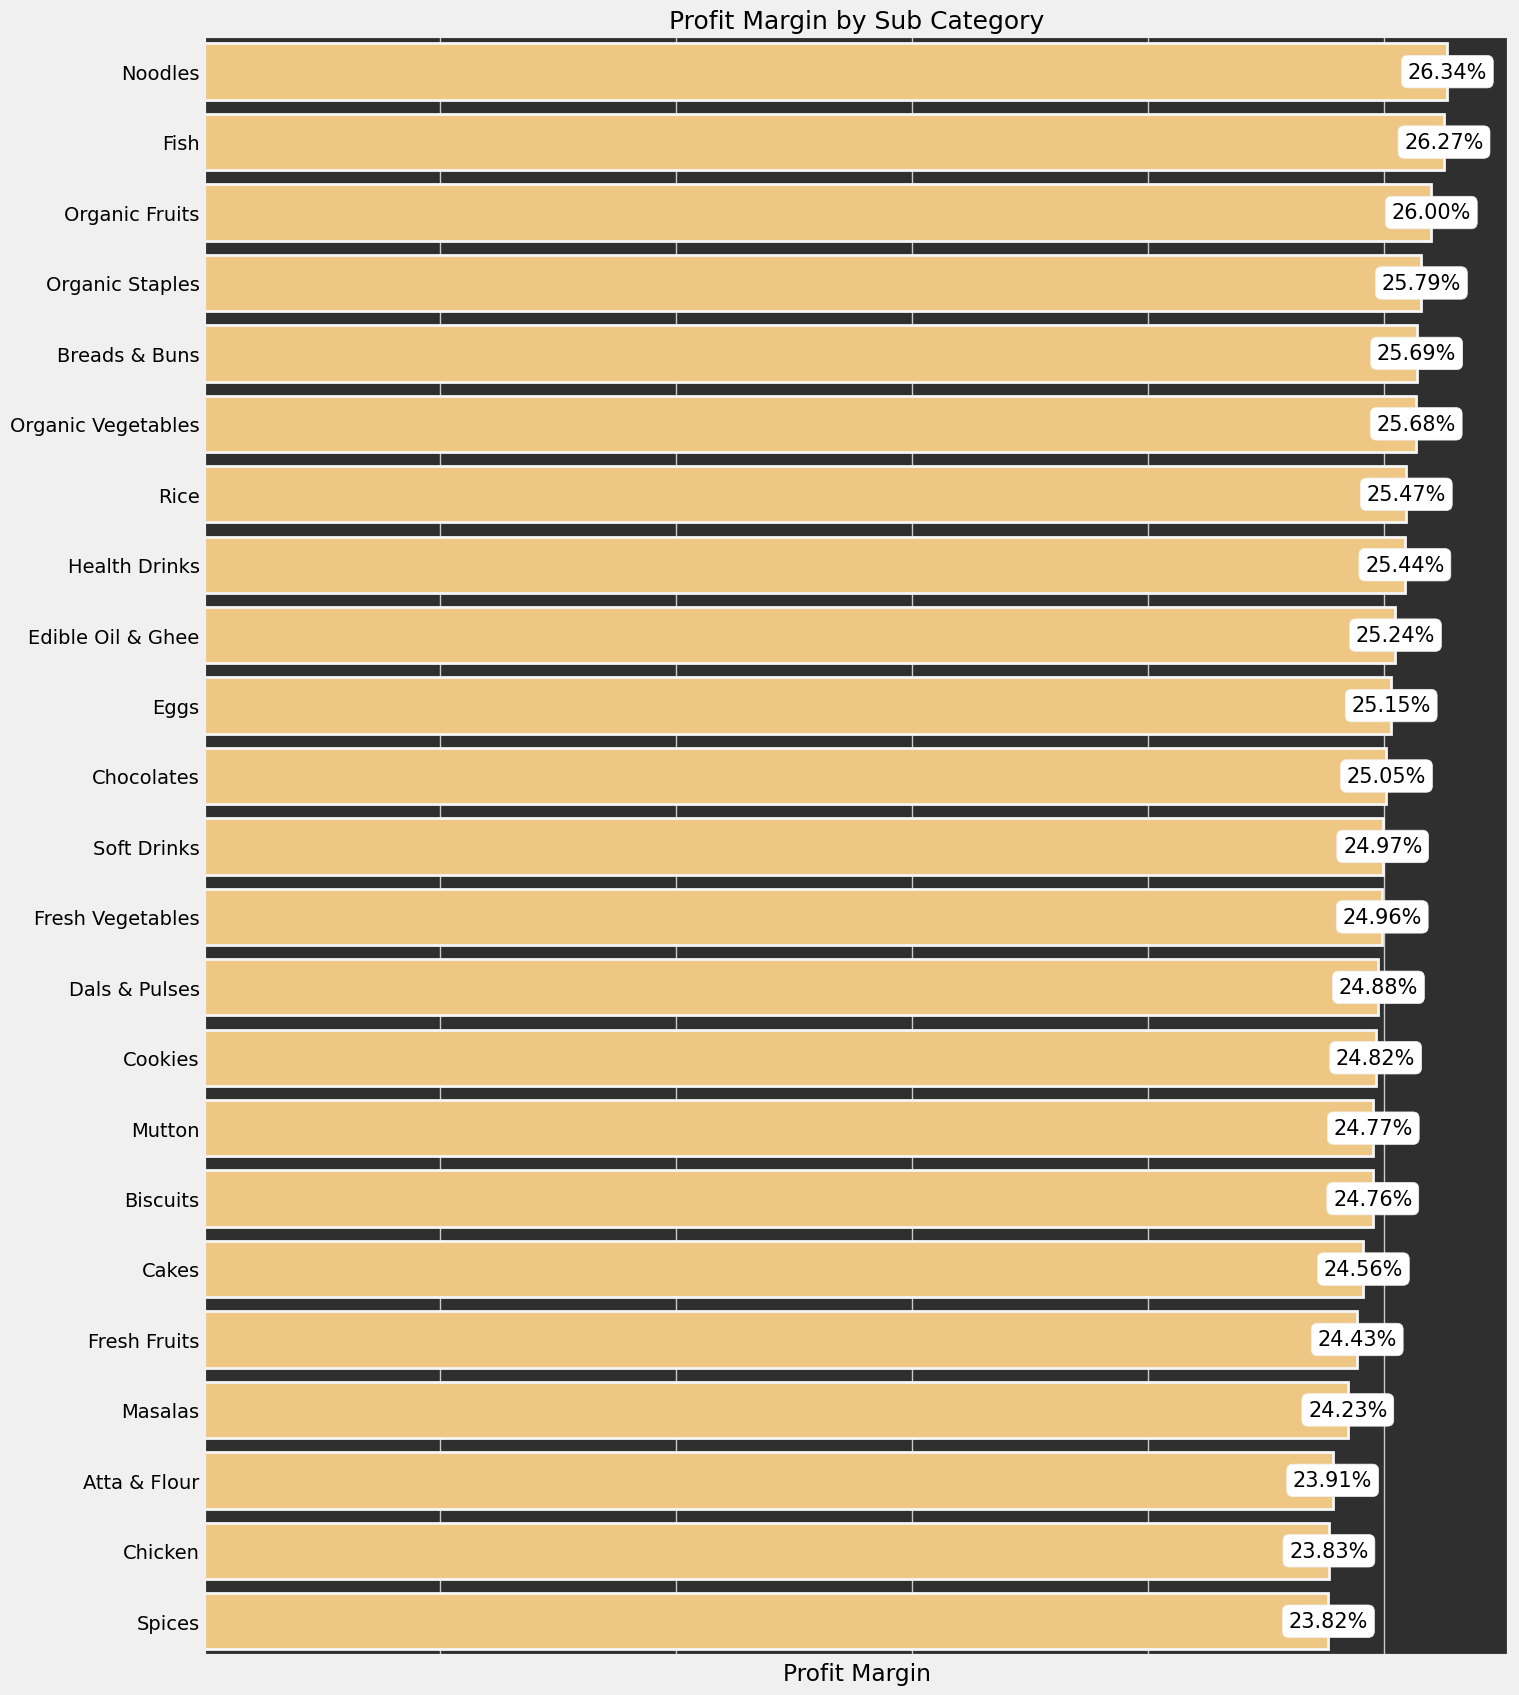

In [477]:
plt.rcParams['figure.figsize'] = (15,20)
ax = plt.axes()
ax.set_facecolor('#2F2F2F')
sns.barplot(y='Sub Category', x='Profit Margin', data=profit, color='#FFCB74', linewidth=2, edgecolor='#F6F6F6')

bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.2f}%'.format(width), 

     ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)


plt.title('Profit Margin by Sub Category', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.ylabel(None)

plt.show()

How much did the company lose by giving discounts?

To find the amount that the company lost by giving discounts, we need to find the original price. We've the sold price of the product in the dataset. We also have the discount percentage for that product.

The formula to find the original price is (Sold Price 100)/100 - (Discount Percent 100)

In [483]:
df['Original Price'] = round((df['Sales'])*100/(100-(df['Discount']*100)),2)
df['Discounted Amount'] = df['Original Price'] - df['Sales']
df.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Original Price,Discounted Amount
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,1425.00,171.00
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,913.41,164.41
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,2987.34,627.34
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,1194.67,298.67
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,3182.43,827.43


In [485]:
discounts = pd.pivot_table(data=df, index='Sub Category',
               values='Discounted Amount', 
               aggfunc='sum').reset_index().sort_values(by='Discounted Amount', ascending=False)
discounts

,Sub Category,Discounted Amount
13,Health Drinks,328813.44
21,Soft Drinks,320158.77
2,Breads & Buns,226694.43
6,Cookies,224371.75
5,Chocolates,221926.05
16,Noodles,217662.48
8,Edible Oil & Ghee,209593.40
14,Masalas,207917.00
3,Cakes,206506.59
1,Biscuits,204938.36


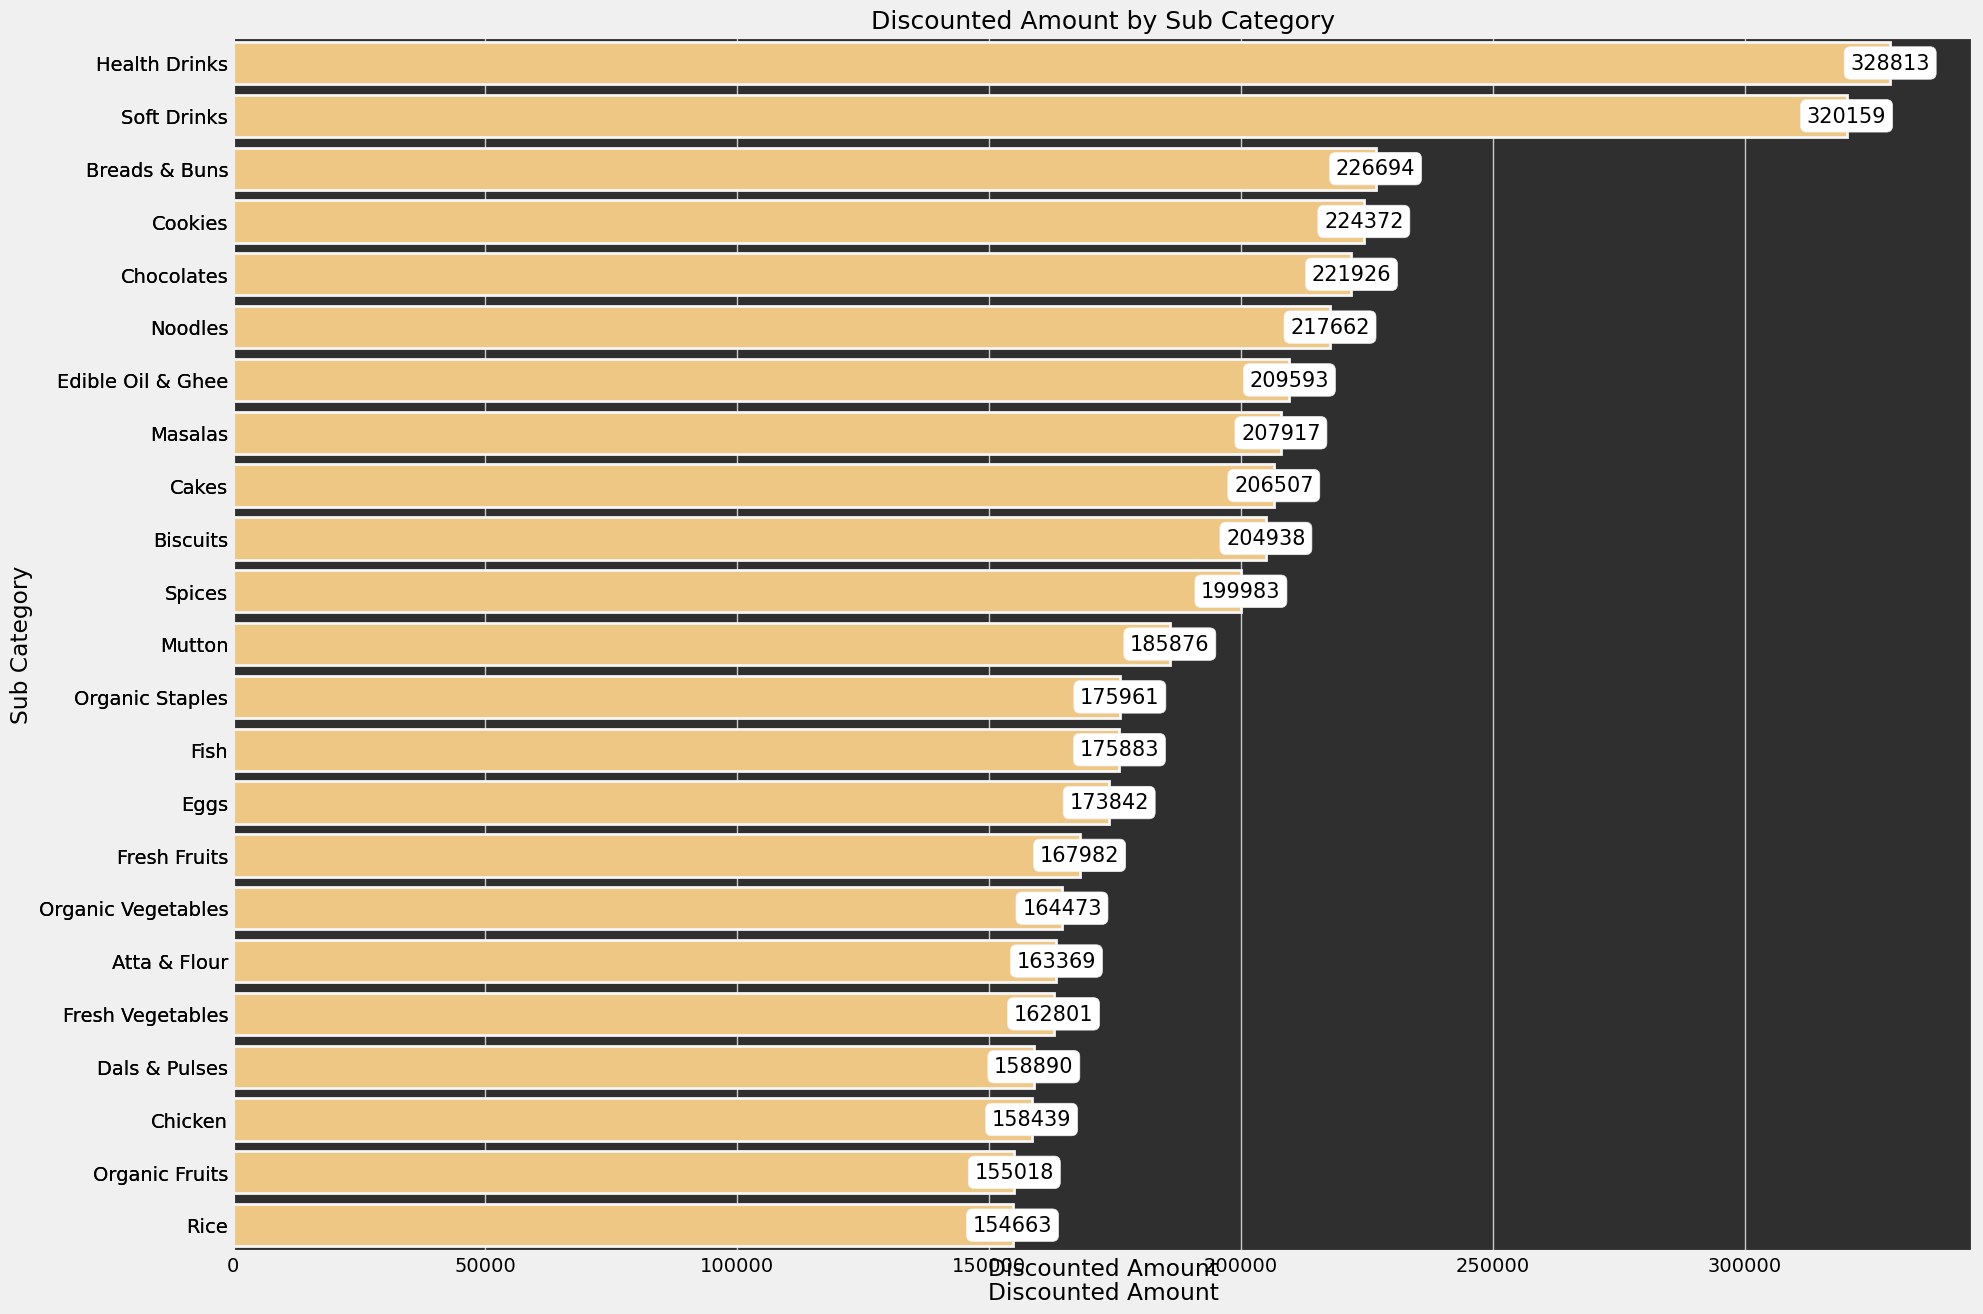

In [497]:
plt.rcParams['figure.figsize'] = (20,15)
ax = plt.axes()
ax.set_facecolor('#2F2F2F')

sns.barplot(y='Sub Category', x='Discounted Amount', data=discounts, color='#FFCB74', linewidth=2, edgecolor='#F6F6F6')

bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)
    
plt.rcParams['figure.figsize'] = (25,20)

ax = plt.axes()
ax.set_facecolor('#2F2F2F')

sns.barplot(y='Sub Category', x= 'Discounted Amount', data=discounts, color='#FFCB74', linewidth=2, edgecolor='#F6F6F6')

bbox_args = dict(boxstyle = 'round', fc = '1')
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y() + 0.5 * p.get_height(), '{:1.0f}'.format(width), 
             ha = 'center', 
             va = 'center', 
             color = 'black', 
             bbox = bbox_args, 
             fontsize = 15)
    
plt.title('Discounted Amount by Sub Category', fontsize = 18)
plt.tick_params(left=False, bottom=False, labelbottom=False)
plt.ylabel(None)
plt.show()

Total Sales & Orders by Year

In [509]:
year_performance = pd.pivot_table(data=df, index='Order Date', values=['Order ID', 'Sales', 'Profit'], 
               aggfunc={'Order ID':'count', 'Sales':'sum', 'Profit':'sum'}).reset_index()
year_performance

,Order Date,Order ID,Profit,Sales
0,01-01-2018,10,6207.78,19111
1,01-02-2016,8,2754.73,12663
2,01-02-2017,2,190.33,1152
3,01-02-2018,8,3587.50,13358
4,01-03-2015,1,380.16,864
...,...,...,...,...
1231,9/29/2017,10,4185.96,15639
1232,9/29/2018,21,8980.00,37084
1233,9/30/2015,6,826.98,6790
1234,9/30/2017,2,649.46,2821


Did the region with least Sales/Order record the least Profit/Order?

In [527]:
sales_orders_region = pd.pivot_table(data=df, index='Region', values=['Order ID', 'Sales', 'Profit'], 
               aggfunc = {'Order ID':'count', 'Sales':'sum', 'Profit':'sum'}).reset_index().sort_values(by='Sales', ascending=False)
sales_orders_region['Sales Per Order'] = sales_orders_region['Sales']/sales_orders_region['Order ID']
sales_orders_region['Profit Per Order'] = sales_orders_region['Profit']/sales_orders_region['Order ID']
sales_orders_region[['Region', 'Sales Per Order', 'Profit Per Order']]

,Region,Sales Per Order,Profit Per Order
4,West,1498.202623,372.152548
1,East,1491.702247,377.228083
0,Central,1492.964270,368.836350
3,South,1507.387894,385.153113
2,North,1254.000000,401.280000


 Which city has the more Chicken & Mutton lovers?

In [530]:
mutton = df[(df['Sub Category'] == 'Mutton') | (df['Sub Category'] == 'Chicken')]

mutton_pivot = pd.pivot_table(data=mutton, index='City', 
                               values='Order ID', aggfunc='count').sort_values(by='Order ID', ascending=False)
mutton_pivot.head(1)

,Order ID
City,
Kanyakumari,44


Name three cities which have the highest Sales/Customers for Cakes and Chocolates.

In [533]:
chocolate_cakes = df[(df['Sub Category'] == 'Cakes') | (df['Sub Category'] == 'Chocolates')]

avg_sales_per_customer = pd.pivot_table(data=chocolate_cakes, index='City', values=['Sales', 'Customer Name'], 
               aggfunc = {'Customer Name':'count', 'Sales':'sum'}).reset_index()
avg_sales_per_customer['Sales Per Customer'] = round(avg_sales_per_customer['Sales']/avg_sales_per_customer['Customer Name'], 2)
avg_sales_per_customer[['City','Sales Per Customer']].sort_values(by='Sales Per Customer', ascending=False).head(3)

,City,Sales Per Customer
16,Salem,1717.91
20,Trichy,1714.26
11,Namakkal,1625.75


Conclusion

We delved into the Supermart Grocery Store Sales Dataset to find the summary metrics. We also framed few questions and answered them by performing data analysis. Framing our own questions to find answers from the dataset is a trait of a data analyst. 

If you like my work, please upvote. Please share your comments and suggestions.

 Thank You!